In [1]:
import numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [21]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


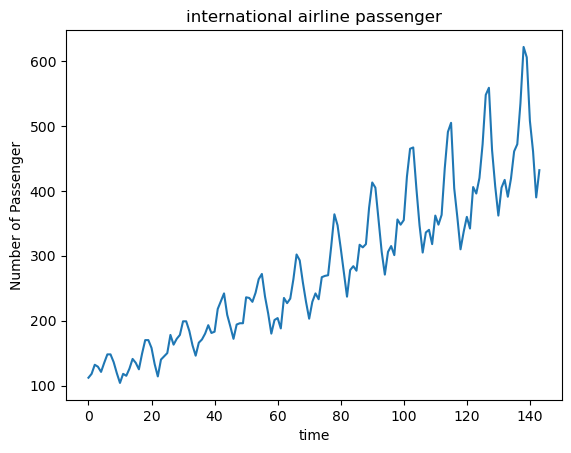

In [32]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [35]:
#reshape
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(144, 1)

In [36]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [25]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [37]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [38]:
def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test

In [39]:
look_back = 1
X, y = create_dataset(dataset, look_back)
print("X:{},y:{}".format(X.shape, y.shape))
X_train, y_train, X_test, y_test = split_data(X, y, 0.33)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X:(142, 1),y:(142,)
X_train:(95, 1),y_train:(95,),X_test:(47, 1),y_test(47,)


In [23]:
X_train

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [26]:
X_test

array([[0.3899614 ],
       [0.4073359 ],
       [0.3803089 ],
       [0.48648646],
       [0.47104248],
       [0.484556  ],
       [0.6138996 ],
       [0.6969112 ],
       [0.70077217],
       [0.57915056],
       [0.46911195],
       [0.38803086],
       [0.44787642],
       [0.45559844],
       [0.4131274 ],
       [0.4980695 ],
       [0.47104248],
       [0.49999997],
       [0.6389961 ],
       [0.7471043 ],
       [0.7741313 ],
       [0.57915056],
       [0.492278  ],
       [0.3976834 ],
       [0.44980696],
       [0.49420848],
       [0.45945945],
       [0.5830116 ],
       [0.5637065 ],
       [0.61003864],
       [0.71042466],
       [0.8571429 ],
       [0.8783784 ],
       [0.69305015],
       [0.5849421 ],
       [0.4980695 ],
       [0.58108103],
       [0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ]], dtype=float3

In [40]:
#reshape
y = y.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(95, 1),y_train:(95, 1),X_test:(47, 1),y_test(47, 1)


In [41]:
# reshape input to be [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [42]:
# model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
 1/95 [..............................] - ETA: 41s - loss: 0.0656

2023-12-08 00:04:44.300174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-08 00:04:44.378452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-08 00:04:44.419269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - 1s 4ms/step - loss: 0.0249
Epoch 2/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 3/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 4/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 5/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 6/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 7/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 8/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 9/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 10/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 11/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 12/50
95/95 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 13/50
95/95 [==============================] - 0s 4ms/

In [43]:
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

(95, 1, 1)
(95, 1)
(47, 1, 1)
(47, 1)
2/2 [==============================] - 0s 7ms/step


2023-12-08 00:05:15.628753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-08 00:05:15.654062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [44]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

In [45]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.69 RMSE
Test Score: 49.95 RMSE


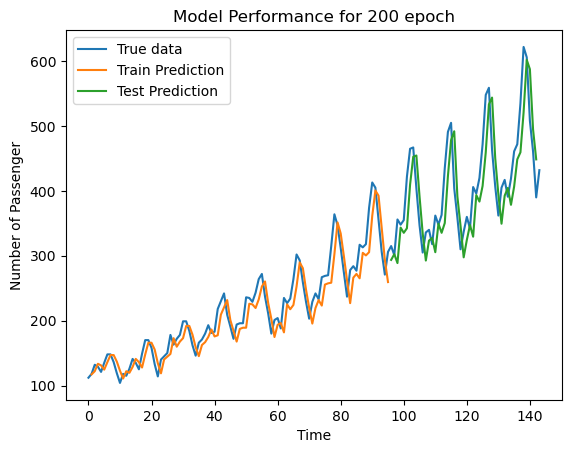

In [47]:
import numpy
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel("Time")
plt.ylabel("Number of Passenger")
plt.title("Model Performance for 200 epoch")
plt.legend(['True data', 'Train Prediction','Test Prediction'])
plt.savefig("outTensorflow.pdf")
plt.show()